# Titanic - Machine Learning

In [153]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, mean_squared_error as mse

df_train = pd.read_csv('csv/train.csv')

# Exploring the data

In [154]:
print(df_train.describe())
print(df_train.info())
print(df_train.isna().sum())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data colu

# Preprocessing data

In [155]:
df_train = df_train.drop(axis=1, columns=['Cabin'])
df_train = df_train.dropna(axis=0, subset=['Embarked'])
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [156]:
df_train['Age'] = df_train['Age'].fillna(np.mean(df_train['Age'], axis=0))
df_train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [157]:
print(df_train.corr(method = 'spearman')['Survived'].sort_values(ascending = False))

Survived       1.000000
Fare           0.320772
Parch          0.140126
SibSp          0.090944
PassengerId   -0.004997
Age           -0.043135
Pclass        -0.336917
Name: Survived, dtype: float64


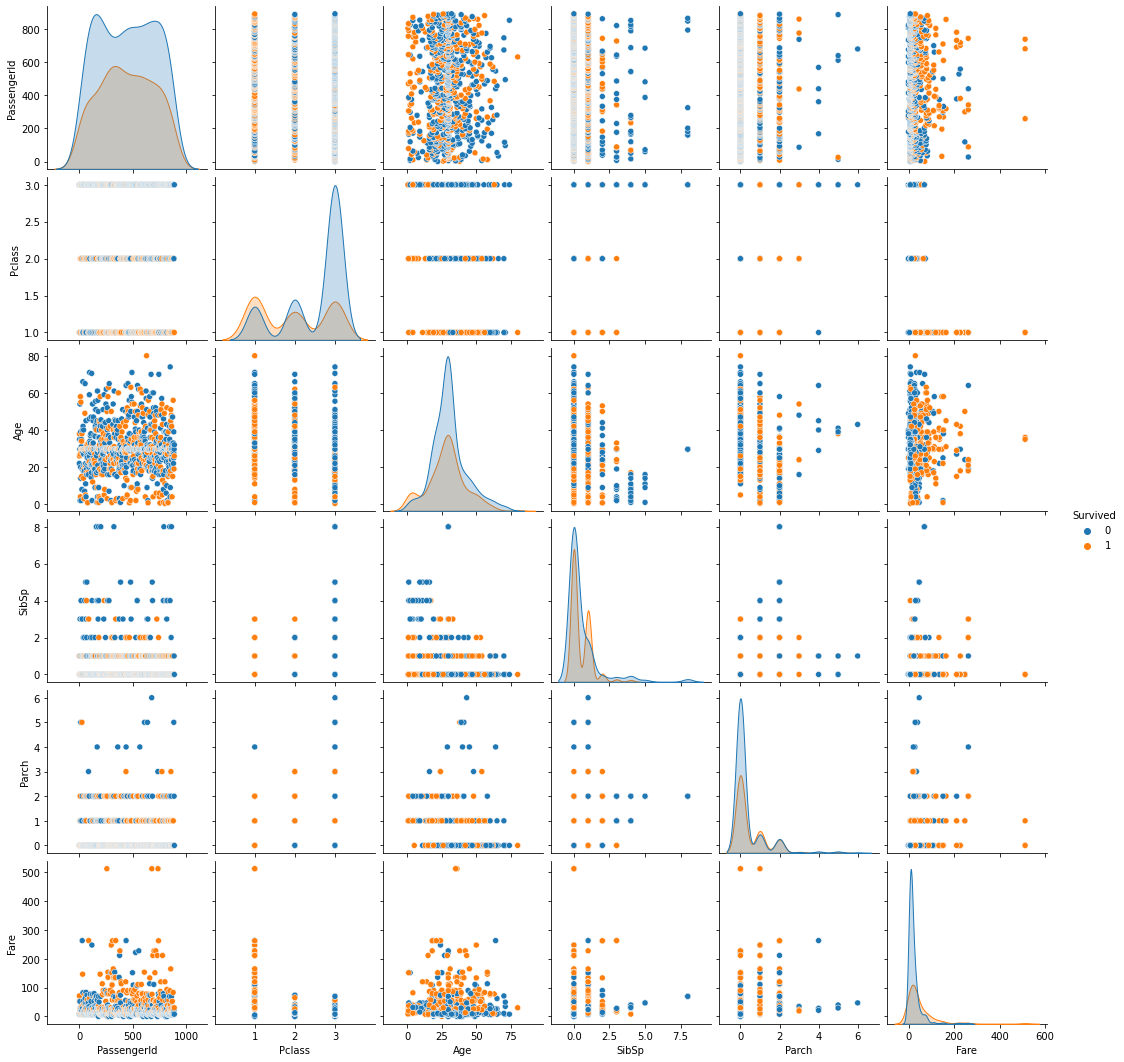

In [158]:
sb.pairplot(df_train, hue='Survived')

In [159]:
df_train_num = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
df_train_object = ['Name', 'Sex', 'Ticket',  'Embarked' ]


ls = []
for feature in df_train_num:
    Q1 = df_train[feature].quantile(0.05)
    Q3 = df_train[feature].quantile(0.95)
    IQR = Q3-Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    ls.extend(df_train.index[(df_train[feature] < lower_bound) | (df_train[feature] > upper_bound)])

ls

[159, 180, 201, 324, 792, 846, 863, 678, 258, 679, 737]

In [160]:
df_num = df_train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]
df_object = df_train[['Sex', 'Embarked' ]]

df_object = pd.get_dummies(df_object, drop_first = True)

In [161]:
df_final = pd.concat([df_num,df_object], axis = 1)
df_train = df_final

In [162]:
df_train = df_train.drop(ls, axis=0)
df_train.reset_index(drop = True)
df_train.shape

(878, 9)

# Train and Test Data

In [163]:
x = df_train.drop(['Survived'], axis=1)
y = df_train['Survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

# Building model

BaggingClassifier's accuracy = 0.801, RandomForestClassifier' accuracy = 0.837.

In [ ]:
bc = BaggingClassifier()

n_estimators = range(100, 120, 20)
max_samples = [4, 5, 6, 7]
max_features = [5, 6, 7, 8]
n_jobs = [-1]
warm_start = [False, True]

params = {"n_estimators": n_estimators, "max_samples": max_samples, "max_features": max_features, "n_jobs": n_jobs, "warm_start": warm_start}
grid = GridSearchCV(bc, params, cv=5)

grid.fit(x_train, y_train)
print("best parameters: " + str(grid.best_params_))

In [164]:
rf = RandomForestClassifier()
max_depth = [2, 3, 4, 5, 6]
n_estimators = range(100, 200, 5)
criterion = ["gini"]
n_jobs = [-1]
bootstrap = [False, True]

params = {"max_depth": max_depth, "n_estimators": n_estimators, "criterion": criterion, "n_jobs": n_jobs, "bootstrap":bootstrap}
grid = GridSearchCV(rf, params, cv=5)

grid.fit(x_train, y_train)
print("best parameters: " + str(grid.best_params_))

best parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 5, 'n_estimators': 13, 'n_jobs': -1}


In [165]:
y_pred = grid.predict(x_test)

# Evaluating the fit of the model

In [166]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: " + str(accuracy))

precision = precision_score(y_test, y_pred)
print("Precision: " + str(precision))

recall = recall_score(y_test, y_pred)
print("Recall: " + str(recall))

matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix: " + str(matrix))

MSE = mse(y_test, y_pred)
RMSE = np.sqrt(MSE)
print("RMSE: " + str(RMSE))
print("std y_test: " + str(np.std(y_test)))

Accuracy: 0.8371212121212122
Precision: 0.9076923076923077
Recall: 0.6145833333333334
Confusion matrix: [[162   6]
 [ 37  59]]
RMSE: 0.4035824424808243
std y_test: 0.48104569292083466


# Test Data

In [167]:
df_test = pd.read_csv('csv/test.csv')

df_test = df_test.drop(['Name', 'Ticket', 'Cabin'], axis=1)

df_passengerID = df_test['PassengerId']

df_num = df_test[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]

df_obj = df_test[['Sex','Embarked']]
df_obj = pd.get_dummies(df_obj, drop_first=True)

df_test = pd.concat([df_num,df_obj], axis=1)
df_test.head(5)

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


In [168]:
df_test["Age"] = df_test["Age"].fillna(np.mean(df_test["Age"]), axis=0)
df_test["Fare"] = df_test["Fare"].fillna(np.mean(df_test["Fare"]), axis=0)
df_test.isna().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [169]:
predict = grid.predict(df_test)
predict

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [170]:
predict = pd.DataFrame(predict)
predict.columns = ['Survived']

submission = pd.concat([df_passengerID, predict], axis=1)
submission.reset_index(drop=True)
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [171]:
submission.to_csv('csv/submission.csv', index=False)